El método del gradiente descendente
===

Método del gradiente descendente
---

Es un proceso iterativo en que el valor actual de $x$ se corrige sumandole un valor $\Delta x$ con signo contrario a la derivada (dirección de descenso), hasta alcanzar el punto de mínima.

La ecuación de corrección o mejora es:
$$
x_k = x_{k-1} - \mu \frac{d}{dx} f(x_{k-1})
$$
donde $\mu$ es la tasa o factor de aprendizaje.

![dev6](assets/gradiente-descendente.jpg)

Notación vectorial:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1})$$

Función de Rosenbrock
---

La función de Rosenbrock de dos dimensiones se define como:

$$f(x, y) = 100 \cdot (x^2 - y)^2 + (1 - x)^2$$

para: 

$$x \in [-2.048, 2.048]$$

$$y \in [-1.000, 4.000]$$ y $$f(1, 1) = 0$$.

Derivada de $f(x, y)$ respecto a $x$
---

$$
\begin{split}
    \frac{\partial}{\partial x} f(x, y) 
    & = \frac{\partial}{\partial x}
        \left[
            100 (x^2 - y)^2 + (1-x)^2
        \right] 
        \\ \\
    & = \frac{\partial}{\partial x} 
        \left[
            100 (x^2 - y)^2 
        \right] 
        + \frac{\partial}{\partial x}
        \left[
            (1-x)^2
        \right] 
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial x} 
            (x^2 - y)
        + 2 \cdot (1 - x)\frac{\partial}{\partial x}
            (1-x)
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial x} 
            (x^2)
        + 2 \cdot (1 - x)\frac{\partial}{\partial x}
            (-x)
        \\ \\
    & = 200 \cdot (x^2 - y) \cdot 2x 
        + 2 \cdot (1 - x) \cdot (-1)
        \\ \\
     & = 400 x (x^2 - y) - 2 (1- x) 
\end{split}
$$

Derivada de $f(x, y)$ respecto a $y$
---

$$
\begin{split}
    \frac{\partial}{\partial y} f(x, y) 
    & = \frac{\partial}{\partial y}
        \left[
            100 (x^2 - y)^2 + (1-x)^2
        \right] 
        \\ \\
    & = \frac{\partial}{\partial y} 
        \left[
            100 (x^2 - y)^2 
        \right] 
        + \frac{\partial}{\partial y}
        \left[
            (1-x)^2
        \right] 
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial y} 
            (x^2 - y)
        + 2 \cdot (1 - x)\frac{\partial}{\partial y}
            (1-x)
        \\ \\
    & = -200 \cdot (x^2 - y) \frac{\partial}{\partial y} 
            (-y)
        + 2 \cdot (1 - x) \cdot 0
        \\ \\
    & = -200 \cdot (x^2 - y) 
\end{split}
$$

Gradiente algebraico
---

El gradiente expresado en forma matricial sería:

$$g(x, y) = \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}) = 
\left[
  \begin{array}{c}
  400 x (x^2-y) - 2(1 - x)
  \\
  -200(x^2 - y)
  \end{array}
\right]
$$

Ejemplo del cómputo
---

In [1]:
#
# Función
#
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2


#
# Gradiente
#
def g(x, y):
    grad_x = 400 * x * (x ** 2 - y) - 2 * (1 - x)
    grad_y = -200 * (x ** 2 - y)
    return grad_x, grad_y


#
# Función de mejora
#
def improve(x, y, mu):
    grad_x, grad_y = g(x, y)
    x = x - mu * grad_x
    y = y - mu * grad_y
    return x, y


#
# Punto de inicio
#
x = -0.5
y = +3.5

history = {"x": [x], "y": [y], "f": [f(x, y)]}


for epoch in range(50):
    x, y = improve(x, y, mu=0.001)
    history["x"].append(x)
    history["y"].append(y)
    history["f"].append(f(x, y))

#
# Ultimo resultado obtenido
#
print("      x = {:6.5f}\n      y = {:+6.5f}\nf(x, y) = {:+6.5f}".format(x, y, f(x, y)))

      x = -1.47399
      y = +2.14267
f(x, y) = +6.21043


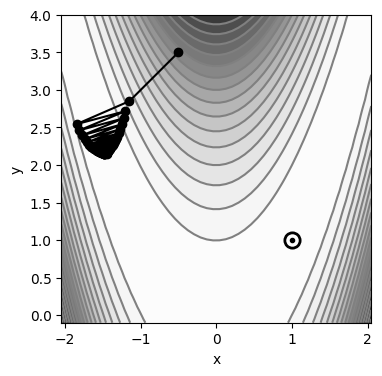

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


def plot_contour():

    X = np.linspace(start=-2.048, stop=2.048, num=50)
    Y = np.linspace(start=-0.1, stop=4.0, num=50)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    plt.subplots(figsize=(4, 4))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(
        [1], [1], "o", color="black", fillstyle="none", markersize=11, markeredgewidth=2
    )
    plt.plot([1], [1], ".", color="black")
    plt.xlabel("x")
    plt.ylabel("y")


plot_contour()
plt.plot(history["x"], history["y"], "o-", color="k")
plt.show()

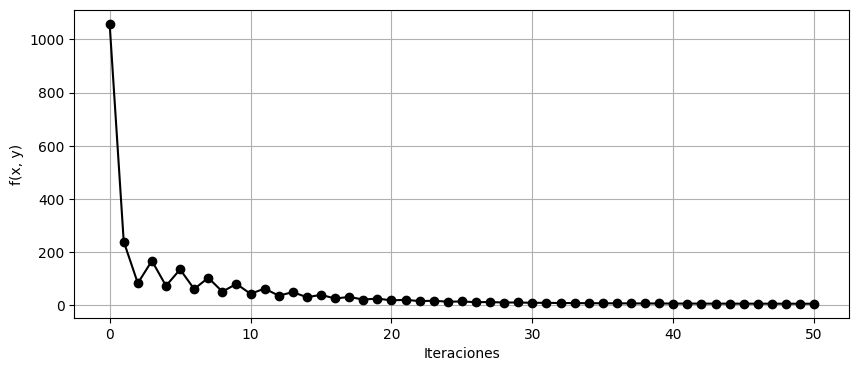

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(history["f"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("f(x, y)")
plt.grid()